In [68]:
import pandas as pd
import numpy as np

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score

In [70]:
%matplotlib inline
import seaborn as sns

In [71]:
songs = pd.read_csv('songs.csv')

In [72]:
songs.head(20)

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3
5,werdz-from-the-ghetto-child,2007,gangstarr,Hip-Hop,"[Smiley] Aiyyo I got the dimes that I get, I g...",1413,26,0,0,2
6,givin-a-little-bit-more,2006,abba,Pop,There's a gentleness to everything you do\nAnd...,714,0,0,0,0
7,nina-pretty-ballerina,2006,abba,Pop,Every day in the morning on her way to the off...,1263,5,0,0,1
8,don-t-break-the-circle,2007,blind-guardian,Metal,Don't break the circle\nDon't break the circle...,1392,3,0,0,0
9,the-name-of-the-game,2001,abba,Pop,"I've seen you twice, in a short time\nOnly a w...",1986,14,0,0,3


In [73]:
X = songs[['year', 'length', 'commas', 'exclamations', 'colons', 'hyphens']]
# X = pd.concat([X, pd.get_dummies(songs.genre)], axis=1)

In [74]:
X.head()

,year,length,commas,exclamations,colons,hyphens
0,2007,1300,24,5,0,11
1,2006,1566,0,0,0,0
2,2006,996,1,0,1,0
3,2015,2868,5,0,0,0
4,2014,3351,22,0,0,3


In [75]:
y = songs['artist']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [77]:
clf = DecisionTreeClassifier(criterion='entropy')

In [78]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [79]:
clf.score(X_train, y_train)

1.0

In [80]:
clf.score(X_test, y_test)

0.6777777777777778

In [81]:
predictions = clf.predict(X_test)

In [82]:
precision = precision_score(y_test, predictions, average='micro')

In [83]:
precision

0.6777777777777778

In [84]:
max_depth_values = range(1,100)

In [85]:
results = []

In [86]:
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    results.append([max_depth, train_score, test_score, mean_cross_val_score])

In [87]:
scores = pd.DataFrame(results, columns=['max_depth', 'train_score', 'test_score', 'cross_val_score'])

In [88]:
scores.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.650000,0.583333,0.638889
1,2,0.727778,0.666667,0.661111
2,3,0.783333,0.683333,0.722222
3,4,0.866667,0.733333,0.744444
4,5,0.922222,0.738889,0.766667


In [89]:
scores_data_long = pd.melt(
    scores,
    id_vars=['max_depth'],
    value_vars=['train_score', 'test_score', 'cross_val_score'],
    var_name='set_type',
    value_name='score'
)

<AxesSubplot:xlabel='max_depth', ylabel='score'>

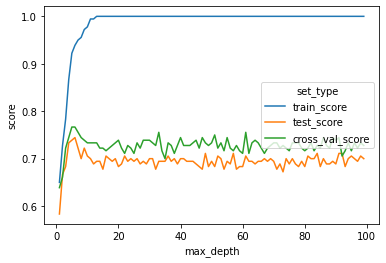

In [90]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')